# Predict whether income exceeds 50K/yr based on census data

https://archive.ics.uci.edu/ml/datasets/Adult

## Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

Prediction task is to determine whether a person makes over 50K a year. 

## Attribute Information:

Listing of attributes: 

+ age: continuous. 
+ workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
+ fnlwgt: continuous. 
+ education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
+ education-num: continuous. 
+ marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
+ occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
+ relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
+ race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
+ sex: Female, Male. 
+ capital-gain: continuous. 
+ capital-loss: continuous. 
+ hours-per-week: continuous. 
+ native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
+ income: >50K, <=50K. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
# Load dataset 
df = pd.read_csv('adult.csv', sep=',')
len(df)

32561

In [3]:
# Remove invalid data from table
df = df[(df.astype(str) != ' ?').all(axis=1)]
len(df)

30162

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df['income_bi'] = df.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1)
df = df.drop(['income','fnlwgt','capital-gain','capital-loss','native-country'], axis=1)
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income_bi
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0


In [6]:
df.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income_bi
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,0
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,1


In [7]:
# Use one-hot encoding on categorial columns
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 
                                 'relationship', 'race', 'sex'])
df.head()

,age,education-num,hours-per-week,income_bi,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,13,40,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,50,13,13,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,38,9,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,40,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,40,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [8]:
# Create a sample csv for prediction
df.iloc[[0]].to_csv('prediction.csv', sep=',', encoding='utf-8', index=False)

In [9]:
# shuffle rows
df = df.sample(frac=1)

# split training and testing data
d_train = df[:25000]
d_test = df[25000:]

d_train_att = d_train.drop(['income_bi'], axis=1)
d_train_gt50 = d_train['income_bi']

d_test_att = d_test.drop(['income_bi'], axis=1)
d_test_gt50 = d_test['income_bi']

d_att = df.drop(['income_bi'], axis=1)
d_gt50 = df['income_bi']

# number of income > 50K in whole dataset:
print("Income >50K: %d out of %d (%.2f%%)" % (np.sum(d_gt50), len(d_gt50), 100*float(np.sum(d_gt50)) / len(d_gt50)))

Income >50K: 7508 out of 30162 (24.89%)


In [10]:
# Fit a decision tree
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
t = t.fit(d_train_att, d_train_gt50)

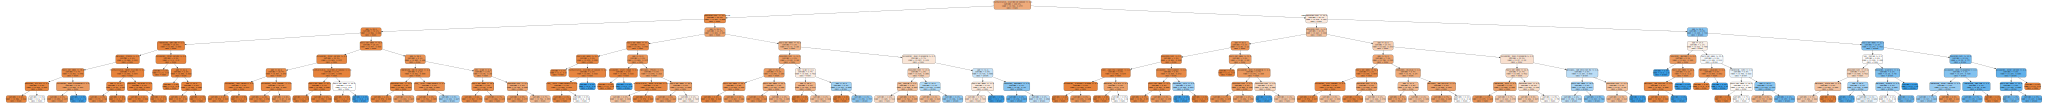

In [11]:
# Visualize tree
dot_data = tree.export_graphviz(t, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(d_train_att), class_names=['lt50K', 'gt50K'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [12]:
t.score(d_test_att, d_test_gt50)

0.820030995738086

In [13]:
scores = cross_val_score(t, d_att, d_gt50, cv=5)
# Show avarage score and +/- two standard deviations away (covering 95% or scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.83 (+/- 0.00)


## Start predicting

In [14]:
sample_df = pd.read_csv('prediction.csv', sep=',')
sample_df = sample_df.drop(['income_bi'], axis=1)

In [15]:
predict_value = sample_df.iloc[0]
y_predict = t.predict([predict_value.tolist()])
y_predict[0]

0

In [16]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_gt50, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.75 (+/- 0.00)
Max depth: 2, Accuracy: 0.82 (+/- 0.01)
Max depth: 3, Accuracy: 0.81 (+/- 0.01)
Max depth: 4, Accuracy: 0.82 (+/- 0.01)
Max depth: 5, Accuracy: 0.82 (+/- 0.01)
Max depth: 6, Accuracy: 0.82 (+/- 0.01)
Max depth: 7, Accuracy: 0.83 (+/- 0.00)
Max depth: 8, Accuracy: 0.83 (+/- 0.00)
Max depth: 9, Accuracy: 0.83 (+/- 0.01)
Max depth: 10, Accuracy: 0.82 (+/- 0.01)
Max depth: 11, Accuracy: 0.82 (+/- 0.01)
Max depth: 12, Accuracy: 0.82 (+/- 0.01)
Max depth: 13, Accuracy: 0.82 (+/- 0.01)
Max depth: 14, Accuracy: 0.81 (+/- 0.01)
Max depth: 15, Accuracy: 0.81 (+/- 0.01)
Max depth: 16, Accuracy: 0.81 (+/- 0.01)
Max depth: 17, Accuracy: 0.80 (+/- 0.01)
Max depth: 18, Accuracy: 0.80 (+/- 0.01)
Max depth: 19, Accuracy: 0.80 (+/- 0.00)
